In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,16,2022-03-15T15:42:51Z,2022-03-15T15:43:01Z,2022-03-15T15:45:32Z,2022-03-15T15:45:33Z,3m26.53334673s,7.009820
1,hpccfft,5,16,4,4,2022-03-15T15:43:51Z,2022-03-15T15:43:58Z,2022-03-15T15:50:41Z,2022-03-15T15:50:42Z,7m33.834206769s,0.649678
2,hpccfft,7,16,4,4,2022-03-15T15:43:52Z,2022-03-15T15:43:58Z,2022-03-15T15:51:08Z,2022-03-15T15:51:11Z,7m52.662855106s,0.543086
3,hpccptrans,5,16,3,3,2022-03-15T15:44:52Z,2022-03-15T15:45:05Z,2022-03-15T15:55:55Z,2022-03-15T15:55:56Z,11m42.065207765s,0.075269
4,hpccptrans,1,16,3,3,2022-03-15T15:44:52Z,2022-03-15T15:45:13Z,2022-03-15T15:56:03Z,2022-03-15T15:56:03Z,11m52.125643148s,0.071380
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15T15:52:22Z,2022-03-15T16:35:42Z,2022-03-15T16:39:52Z,2022-03-15T16:39:54Z,48m14.309438288s,-1.000000
66,hpccptrans,9,16,4,4,2022-03-15T15:54:22Z,2022-03-15T16:38:43Z,2022-03-15T16:47:23Z,2022-03-15T16:47:23Z,53m43.135064334s,0.102096
67,hpccfft,9,16,3,3,2022-03-15T15:55:21Z,2022-03-15T16:38:34Z,2022-03-15T16:44:17Z,2022-03-15T16:44:18Z,49m33.12583805s,0.489067
68,hpccrandomaccess,0,16,4,4,2022-03-15T15:57:22Z,2022-03-15T16:38:44Z,2022-03-15T16:47:28Z,2022-03-15T16:47:28Z,50m42.077762527s,0.026680


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,16,2022-03-15 15:42:51+00:00,2022-03-15 15:43:01+00:00,2022-03-15 15:45:32+00:00,2022-03-15 15:45:33+00:00,0 days 00:03:26.533346730,7.009820,0 days 00:00:10,0 days 00:02:31,0 days 00:00:01
1,hpccfft,5,16,4,4,2022-03-15 15:43:51+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:50:41+00:00,2022-03-15 15:50:42+00:00,0 days 00:07:33.834206769,0.649678,0 days 00:00:07,0 days 00:06:43,0 days 00:00:01
2,hpccfft,7,16,4,4,2022-03-15 15:43:52+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:51:08+00:00,2022-03-15 15:51:11+00:00,0 days 00:07:52.662855106,0.543086,0 days 00:00:06,0 days 00:07:10,0 days 00:00:03
3,hpccptrans,5,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:05+00:00,2022-03-15 15:55:55+00:00,2022-03-15 15:55:56+00:00,0 days 00:11:42.065207765,0.075269,0 days 00:00:13,0 days 00:10:50,0 days 00:00:01
4,hpccptrans,1,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:13+00:00,2022-03-15 15:56:03+00:00,2022-03-15 15:56:03+00:00,0 days 00:11:52.125643148,0.071380,0 days 00:00:21,0 days 00:10:50,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 15:52:22+00:00,2022-03-15 16:35:42+00:00,2022-03-15 16:39:52+00:00,2022-03-15 16:39:54+00:00,0 days 00:48:14.309438288,-1.000000,0 days 00:43:20,0 days 00:04:10,0 days 00:00:02
66,hpccptrans,9,16,4,4,2022-03-15 15:54:22+00:00,2022-03-15 16:38:43+00:00,2022-03-15 16:47:23+00:00,2022-03-15 16:47:23+00:00,0 days 00:53:43.135064334,0.102096,0 days 00:44:21,0 days 00:08:40,0 days 00:00:00
67,hpccfft,9,16,3,3,2022-03-15 15:55:21+00:00,2022-03-15 16:38:34+00:00,2022-03-15 16:44:17+00:00,2022-03-15 16:44:18+00:00,0 days 00:49:33.125838050,0.489067,0 days 00:43:13,0 days 00:05:43,0 days 00:00:01
68,hpccrandomaccess,0,16,4,4,2022-03-15 15:57:22+00:00,2022-03-15 16:38:44+00:00,2022-03-15 16:47:28+00:00,2022-03-15 16:47:28+00:00,0 days 00:50:42.077762527,0.026680,0 days 00:41:22,0 days 00:08:44,0 days 00:00:00


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-15 15:42:51+00:00,2022-03-15 15:43:01+00:00,2022-03-15 15:45:32+00:00,2022-03-15 15:45:33+00:00,0 days 00:03:26.533346730,7.009820,0 days 00:00:10,0 days 00:02:31,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 15:43:51+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:50:41+00:00,2022-03-15 15:50:42+00:00,0 days 00:07:33.834206769,0.649678,0 days 00:00:07,0 days 00:06:43,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 15:43:52+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:51:08+00:00,2022-03-15 15:51:11+00:00,0 days 00:07:52.662855106,0.543086,0 days 00:00:06,0 days 00:07:10,0 days 00:00:03,2022-03-15 15:42:51+00:00,0 days 00:01:01
3,hpccptrans,5,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:05+00:00,2022-03-15 15:55:55+00:00,2022-03-15 15:55:56+00:00,0 days 00:11:42.065207765,0.075269,0 days 00:00:13,0 days 00:10:50,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:13+00:00,2022-03-15 15:56:03+00:00,2022-03-15 15:56:03+00:00,0 days 00:11:52.125643148,0.071380,0 days 00:00:21,0 days 00:10:50,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 15:52:22+00:00,2022-03-15 16:35:42+00:00,2022-03-15 16:39:52+00:00,2022-03-15 16:39:54+00:00,0 days 00:48:14.309438288,-1.000000,0 days 00:43:20,0 days 00:04:10,0 days 00:00:02,2022-03-15 15:42:51+00:00,0 days 00:09:31
66,hpccptrans,9,16,4,4,2022-03-15 15:54:22+00:00,2022-03-15 16:38:43+00:00,2022-03-15 16:47:23+00:00,2022-03-15 16:47:23+00:00,0 days 00:53:43.135064334,0.102096,0 days 00:44:21,0 days 00:08:40,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:11:31
67,hpccfft,9,16,3,3,2022-03-15 15:55:21+00:00,2022-03-15 16:38:34+00:00,2022-03-15 16:44:17+00:00,2022-03-15 16:44:18+00:00,0 days 00:49:33.125838050,0.489067,0 days 00:43:13,0 days 00:05:43,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:12:30
68,hpccrandomaccess,0,16,4,4,2022-03-15 15:57:22+00:00,2022-03-15 16:38:44+00:00,2022-03-15 16:47:28+00:00,2022-03-15 16:47:28+00:00,0 days 00:50:42.077762527,0.026680,0 days 00:41:22,0 days 00:08:44,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:14:31


In [7]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([16,  4,  3,  1,  2])

#  performance

In [9]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [10]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,16,6.383027,1.052781
1,hpccstream,16,2,16,3.087033,2.983445
2,hpccstream,16,1,16,3.257677,3.011093
0,hpccfft,16,4,4,4.353355,5.313340
0,hpccfft,16,1,1,3.049500,5.726858
0,hpccfft,16,2,2,-0.295111,0.704889
0,hpccfft,16,3,3,-0.255467,0.744533
0,hpccptrans,16,3,3,0.118418,0.068700
0,hpccptrans,16,1,1,1.288435,2.288435
0,hpccptrans,16,2,2,1.364053,2.599161


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3        16         6.383027        1.052781
1  hpccstream      16       2        16         3.087033        2.983445
2  hpccstream      16       1        16         3.257677        3.011093
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         4.353355        5.313340
0   hpccfft      16       1         1         3.049500        5.726858
0   hpccfft      16       2         2        -0.295111        0.704889
0   hpccfft      16       3         3        -0.255467        0.744533
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.118418        0.068700
0  hpccptrans      16       1         1         1.288435        2.288435
0  hpccptrans      16       2         2         1.364053        2.599161
0  hpccptrans      16       4         4         0.102096     

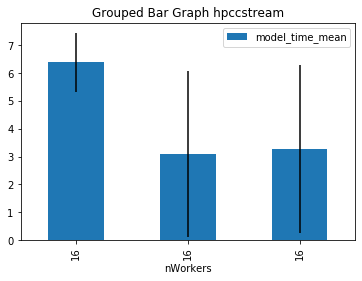

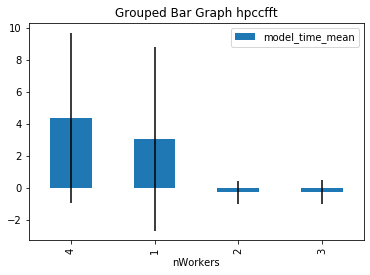

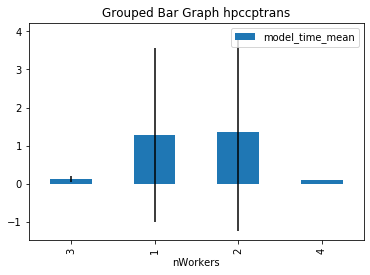

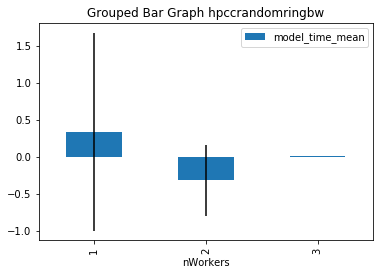

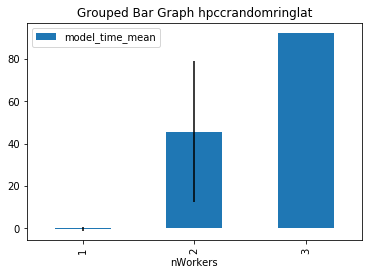

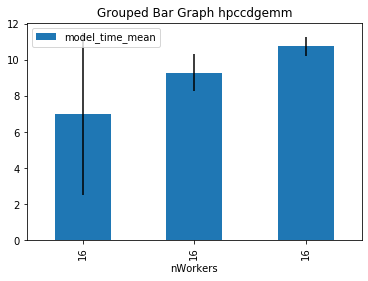

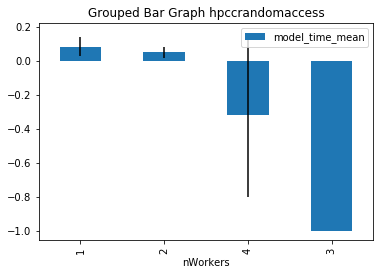

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [12]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [13]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,16,0 days 00:11:24.500000,0 days 00:15:23.094388456,0 days 00:02:02.250000,0 days 00:00:18.646380345,0 days 00:00:02,0 days 00:00:02.915475947,0 days 00:14:12.417112347,0 days 00:15:15.739372959
1,hpccstream,16,2,16,0 days 00:25:48.666666666,0 days 00:12:06.672935752,0 days 00:01:53.666666666,0 days 00:00:04.784233364,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:28:28.000156928,0 days 00:12:11.974346449
2,hpccstream,16,1,16,0 days 00:38:14.666666666,0 days 00:07:14.634968169,0 days 00:02:04.666666666,0 days 00:00:05.436502143,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:41:10.317430973,0 days 00:07:15.900116825
0,hpccfft,16,4,4,0 days 00:06:14,0 days 00:08:39.723644513,0 days 00:06:14.333333333,0 days 00:01:00.642852468,0 days 00:00:01.666666666,0 days 00:00:00.942809041,0 days 00:13:08.447839444,0 days 00:07:39.965506141
0,hpccfft,16,1,1,0 days 00:23:14,0 days 00:09:37.877149574,0 days 00:01:17,0 days 00:00:05.354126134,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:25:09.850881479,0 days 00:09:31.005937967
0,hpccfft,16,2,2,0 days 00:27:18,0 days 00:08:47,0 days 00:04:58.500000,0 days 00:00:48.500000,0 days 00:00:00,0 days 00:00:00,0 days 00:32:54.485360177,0 days 00:07:54.359581604
0,hpccfft,16,3,3,0 days 00:43:16.500000,0 days 00:00:03.500000,0 days 00:04:56.500000,0 days 00:00:46.500000,0 days 00:00:01.500000,0 days 00:00:00.500000,0 days 00:48:53.717638169,0 days 00:00:39.408199881
0,hpccptrans,16,3,3,0 days 00:07:39.250000,0 days 00:12:39.667155733,0 days 00:09:05.250000,0 days 00:02:25.346783590,0 days 00:00:00.250000,0 days 00:00:00.433012701,0 days 00:17:28.112319787,0 days 00:10:23.394726425
0,hpccptrans,16,1,1,0 days 00:28:50,0 days 00:00:52,0 days 00:01:41.500000,0 days 00:00:10.500000,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:31:15.643213145,0 days 00:00:51.442103879
0,hpccptrans,16,2,2,0 days 00:36:06.333333333,0 days 00:02:40.410584300,0 days 00:04:58.666666666,0 days 00:03:11.088693775,0 days 00:00:00.666666666,0 days 00:00:00.942809041,0 days 00:41:45.445685677,0 days 00:05:42.659596630


<ipython-input-14-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



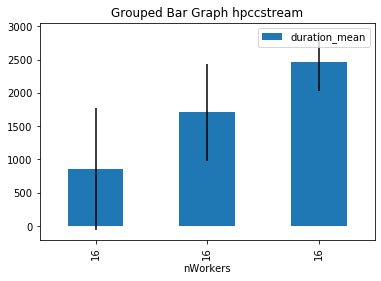

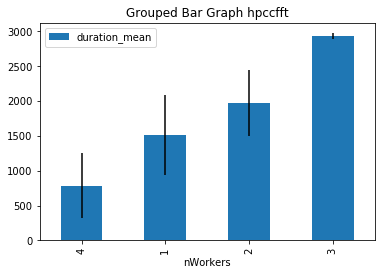

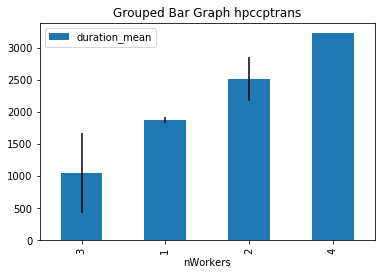

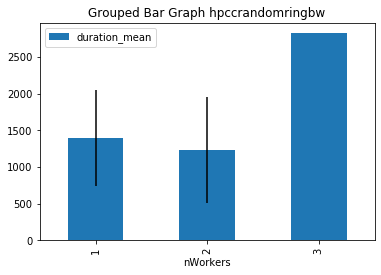

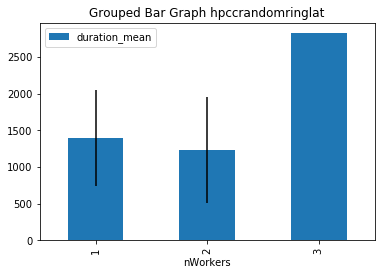

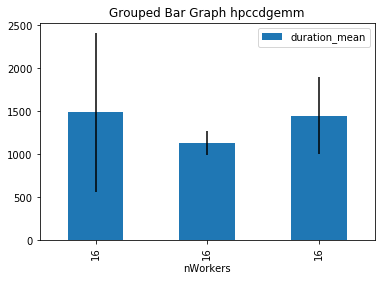

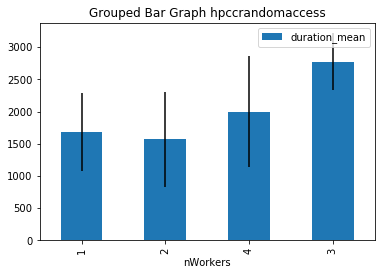

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [15]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [16]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,14268.0,1204.0,10.0,15944.621213
0,hpccfft,16,13773.0,2544.0,9.0,16711.302159
0,hpccptrans,16,14457.0,3800.0,4.0,18683.207827
0,hpccrandomringbw,16,13652.0,885.0,2.0,14907.180960
0,hpccrandomringlat,16,13652.0,885.0,2.0,14907.180960
0,hpccdgemm,16,7772.0,5834.0,7.0,14041.543907
0,hpccrandomaccess,16,16312.0,2929.0,2.0,19608.204983


<ipython-input-17-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



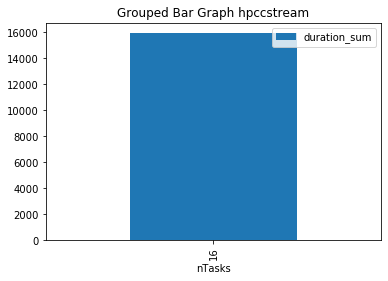

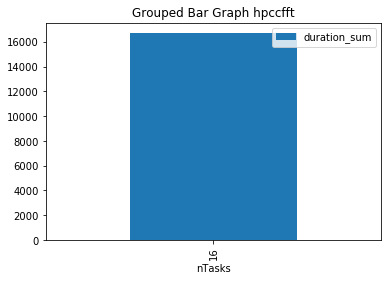

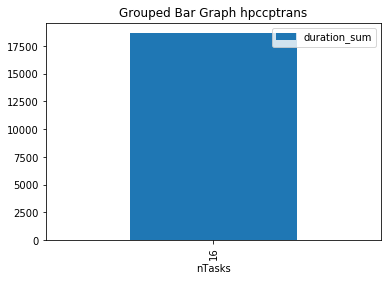

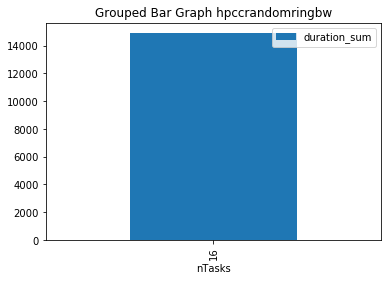

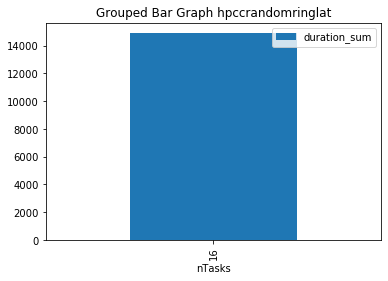

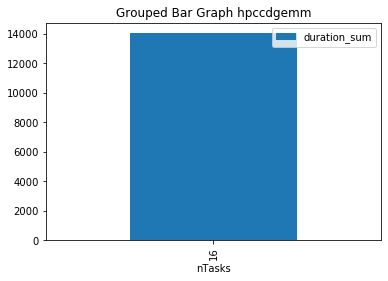

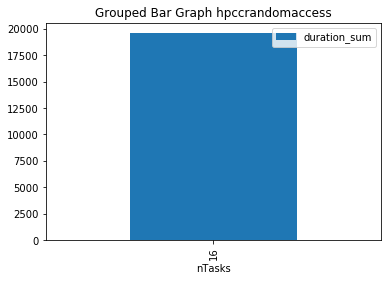

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [18]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-15 15:42:51+00:00,2022-03-15 15:43:01+00:00,2022-03-15 15:45:32+00:00,2022-03-15 15:45:33+00:00,0 days 00:03:26.533346730,7.009820,0 days 00:00:10,0 days 00:02:31,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 15:43:51+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:50:41+00:00,2022-03-15 15:50:42+00:00,0 days 00:07:33.834206769,0.649678,0 days 00:00:07,0 days 00:06:43,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 15:43:52+00:00,2022-03-15 15:43:58+00:00,2022-03-15 15:51:08+00:00,2022-03-15 15:51:11+00:00,0 days 00:07:52.662855106,0.543086,0 days 00:00:06,0 days 00:07:10,0 days 00:00:03,2022-03-15 15:42:51+00:00,0 days 00:01:01
3,hpccptrans,5,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:05+00:00,2022-03-15 15:55:55+00:00,2022-03-15 15:55:56+00:00,0 days 00:11:42.065207765,0.075269,0 days 00:00:13,0 days 00:10:50,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-15 15:44:52+00:00,2022-03-15 15:45:13+00:00,2022-03-15 15:56:03+00:00,2022-03-15 15:56:03+00:00,0 days 00:11:52.125643148,0.071380,0 days 00:00:21,0 days 00:10:50,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 15:52:22+00:00,2022-03-15 16:35:42+00:00,2022-03-15 16:39:52+00:00,2022-03-15 16:39:54+00:00,0 days 00:48:14.309438288,-1.000000,0 days 00:43:20,0 days 00:04:10,0 days 00:00:02,2022-03-15 15:42:51+00:00,0 days 00:09:31
66,hpccptrans,9,16,4,4,2022-03-15 15:54:22+00:00,2022-03-15 16:38:43+00:00,2022-03-15 16:47:23+00:00,2022-03-15 16:47:23+00:00,0 days 00:53:43.135064334,0.102096,0 days 00:44:21,0 days 00:08:40,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:11:31
67,hpccfft,9,16,3,3,2022-03-15 15:55:21+00:00,2022-03-15 16:38:34+00:00,2022-03-15 16:44:17+00:00,2022-03-15 16:44:18+00:00,0 days 00:49:33.125838050,0.489067,0 days 00:43:13,0 days 00:05:43,0 days 00:00:01,2022-03-15 15:42:51+00:00,0 days 00:12:30
68,hpccrandomaccess,0,16,4,4,2022-03-15 15:57:22+00:00,2022-03-15 16:38:44+00:00,2022-03-15 16:47:28+00:00,2022-03-15 16:47:28+00:00,0 days 00:50:42.077762527,0.026680,0 days 00:41:22,0 days 00:08:44,0 days 00:00:00,2022-03-15 15:42:51+00:00,0 days 00:14:31


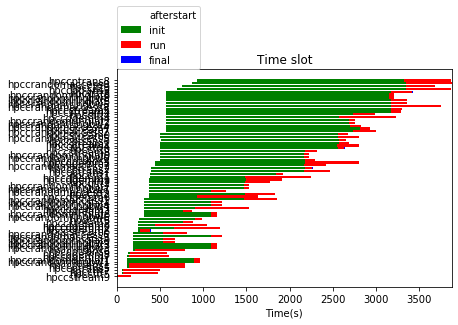

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
